In [1]:
# Import Libraries

import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
# Read in the data

path = 'data/movies.csv'
df = pd.read_csv(path)

In [3]:
# Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Let's see if there is any missing data

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print(f'{col}-{pct_missing}%')

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [5]:
# Data types our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df['budget'].fillna(0, inplace=True)
df['gross'].fillna(0, inplace=True)

In [8]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [9]:
# create correct year column
df['year_correct'] = df['released'].astype(str).str.split(',').str[1].str.strip().str[:4]

In [10]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [11]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [13]:
# Budget high correlation
#I think company has a high correlation

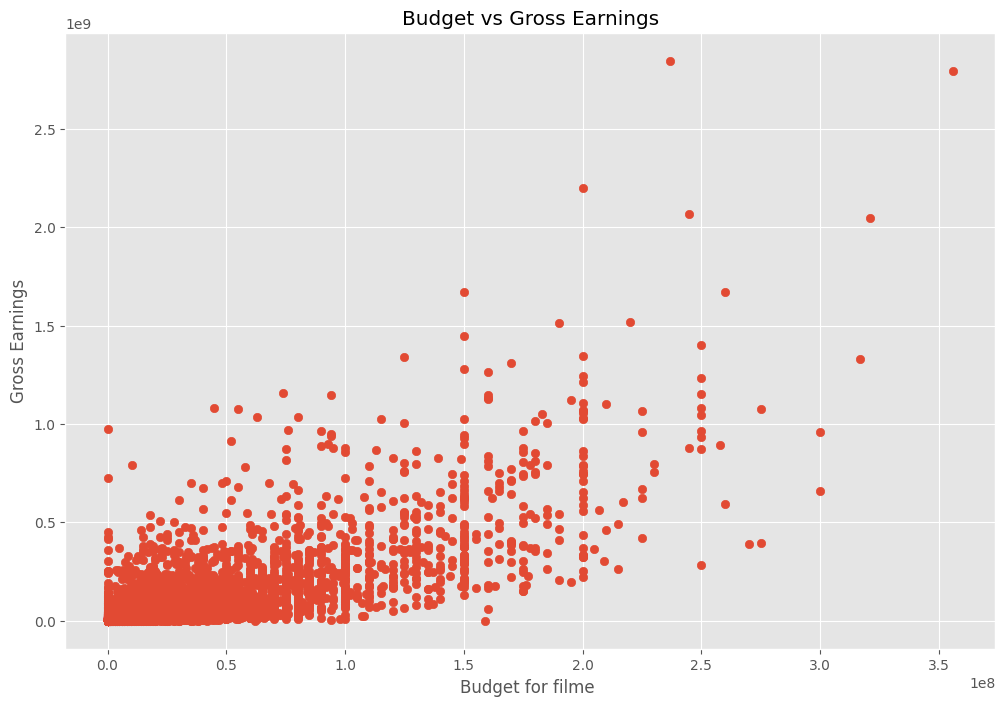

In [14]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for filme ')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

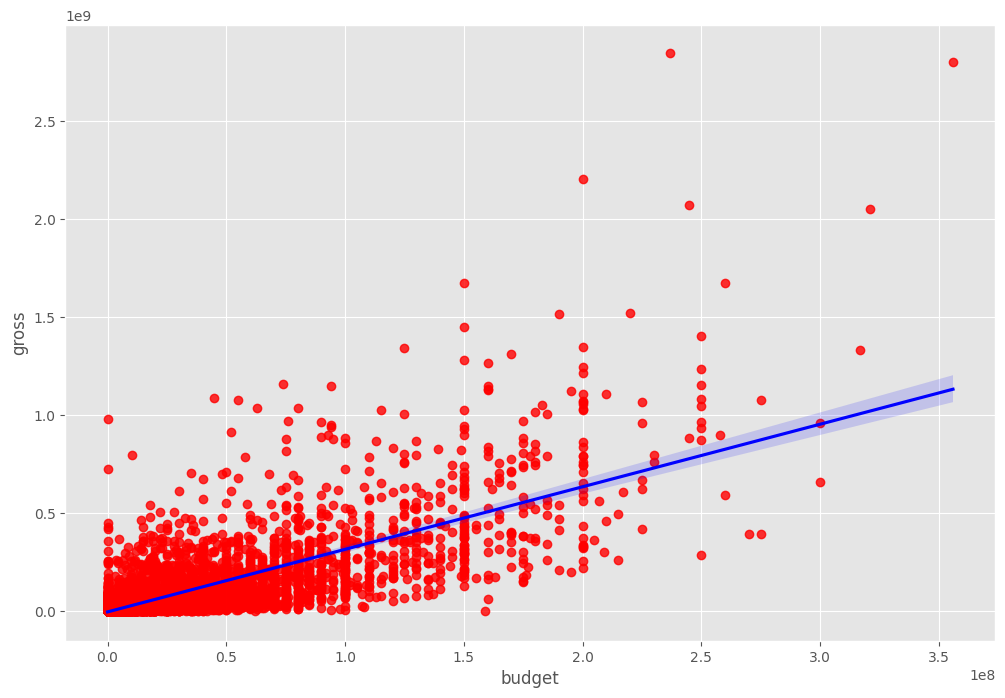

In [15]:
# Plot budget vs gross using seaborn 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": 'red'}, line_kws={'color': 'blue'})

In [16]:
# Let's start looking at correlation 
col_numericas = df.select_dtypes(include=['number'])
correlation = col_numericas.corr()
correlation[['budget', 'gross', 'votes', 'year', 'runtime', 'score']].sort_values(by=['budget', 'gross'], ascending=False)

,budget,gross,votes,year,runtime,score
budget,1.000000,0.750157,0.486862,0.309212,0.269510,0.055665
gross,0.750157,1.000000,0.632834,0.261900,0.245235,0.186392
votes,0.486862,0.632834,1.000000,0.222945,0.309212,0.409182
year,0.309212,0.261900,0.222945,1.000000,0.120811,0.097995
runtime,0.269510,0.245235,0.309212,0.120811,1.000000,0.399451
score,0.055665,0.186392,0.409182,0.097995,0.399451,1.000000


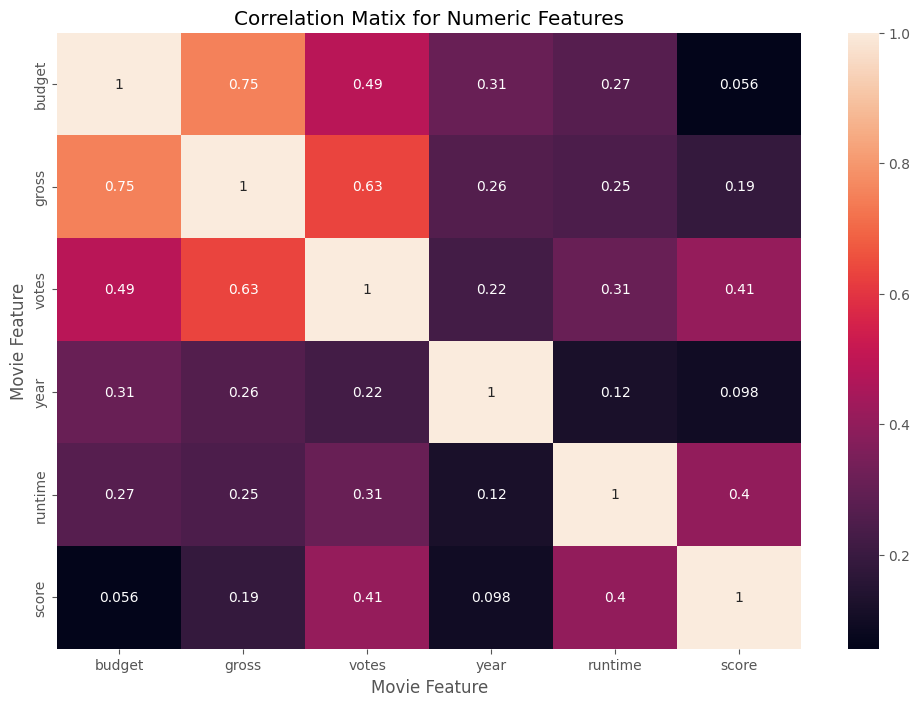

In [17]:
# High correlation between budget and gross
correlation = col_numericas.corr(method='pearson')
correlation_matrix = (correlation[['budget', 'gross', 'votes', 'year', 'runtime', 'score']]
                      .sort_values(by=['budget', 'gross'], ascending=False))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matix for Numeric Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [18]:
# Looks company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [19]:
df_numerize = df.copy()

for col in df_numerize: 
    if (df_numerize[col].dtype == 'object'): 
        df_numerize[col] = df_numerize[col].astype('category')
        df_numerize[col] = df_numerize[col].cat.codes


In [20]:
df_numerize

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1277,4.5,274.0,117,82,2797,55,0,0,1159,92.0,10
1614,1745,6,10,1989,55,5.2,1300.0,1033,1743,166,54,0,0,146,85.0,9
1606,2691,6,8,1989,257,6.0,2900.0,2743,946,1195,6,0,0,2237,89.0,9
1601,3836,-1,4,1989,1160,7.1,1500.0,1105,1696,681,18,0,0,504,104.0,10


In [25]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


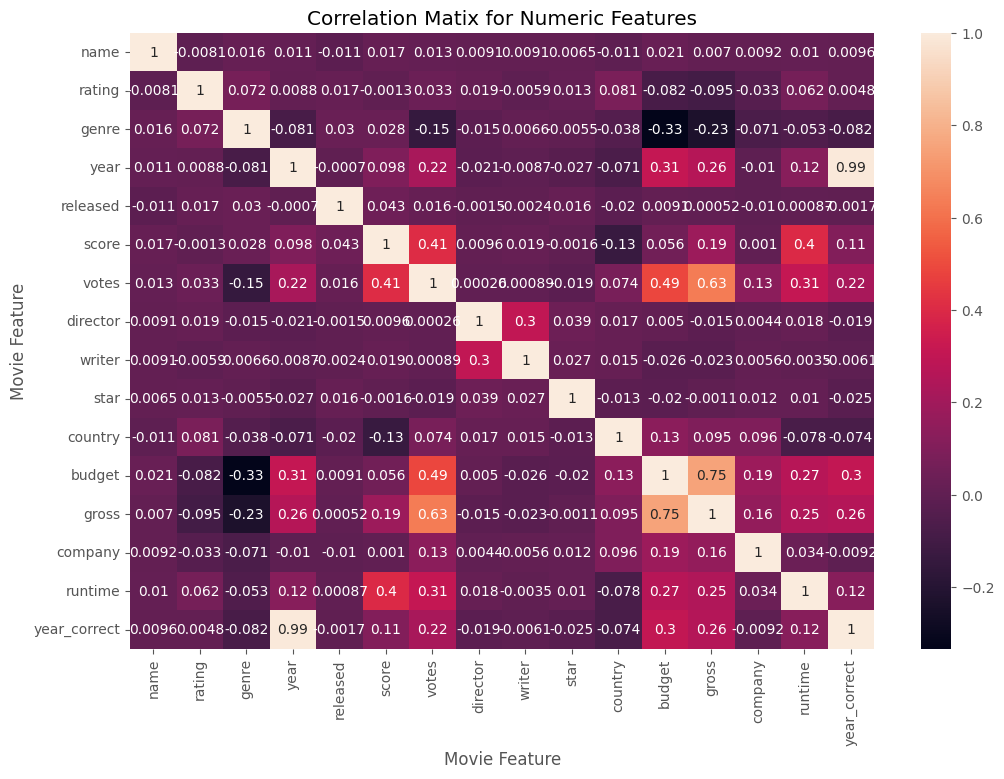

In [21]:
# High correlation between budget and gross

correlation_matrix = df_numerize.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matix for Numeric Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [22]:
correlation_mat = df_numerize.corr()
correlation_pairs = correlation_mat.unstack()
sorted_pairs = correlation_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs > 0.5)]
high_corr

votes         gross           0.632834
gross         votes           0.632834
budget        gross           0.750157
gross         budget          0.750157
year_correct  year            0.992136
year          year_correct    0.992136
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [23]:
# Votes and budget the highest correlation to gross earnings
# Company has low correlation